# Absenteeism at work

# Business Understanding
#The growing economy demands a high physical and mental presence of employees in order to bring about growth not only in the company itself however, individually too. The amount of absenteeism at work is increasing due to several reasons such as growing family and increased workload. It is necessary to understand the reasons for the same and hence provide solutions to the employees inorder to not only gain the loyalty of the employees, but also generate growth in the company

In [51]:
#Importing numpy and pandas
import numpy as np
import pandas as pd
sns.set_style('whitegrid')

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Information
The dataset has several ncombinations of attributes and attribute exclusions, or the modification of the same such as categorical, integer, or real , depending on the purpose of the research.
Attribute Information:

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

In [ ]:
# Reading the dataset

data = pd.read_csv("C:\\Users\\ancy rose thomas\\Desktop\\Capstone\\Capstone-Abseteeism at work\\Absenteeism_at_work_mod.csv")

# Data Understanding

In [13]:
# Checking the type

type(data)

pandas.core.frame.DataFrame

In [14]:
# Checking the head of the data

data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,Tuesday,Summer,289,36,13,33,"2,39,554",...,no,high school,2,yes,no,1,90,172,30,4
1,36,0,7,Tuesday,Summer,118,13,18,50,"2,39,554",...,yes,high school,1,yes,no,0,98,178,31,0
2,3,23,7,Wednesday,Summer,179,51,18,38,"2,39,554",...,no,high school,0,yes,no,0,89,170,31,2
3,7,7,7,Thursday,Summer,279,5,14,39,"2,39,554",...,no,high school,2,yes,yes,0,68,168,24,4
4,11,23,7,Thursday,Summer,289,36,13,33,"2,39,554",...,no,high school,2,yes,no,1,90,172,30,2


In [15]:
# Checking the shape of the data

data.shape

(740, 21)

# Data Preperation/Cleaning

In [16]:
# Checking the no. of null values in data after imputing the missing values

data.isnull().sum().sum()

0

In [18]:
#Mean absence in hours

data['Absenteeism time in hours'].mean()

6.924324324324324

# Data Visualisation

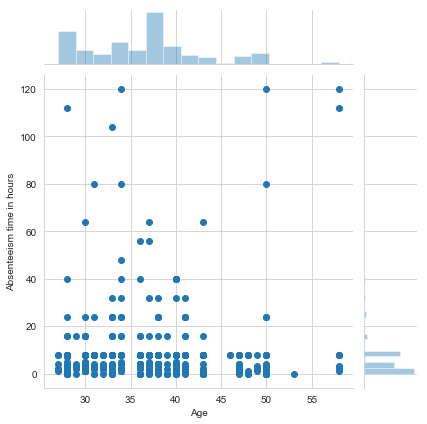

In [19]:
#hours of absence have some correlation with age of worker

sns.jointplot(x='Age',y='Absenteeism time in hours',data=data)

<Figure size 864x432 with 0 Axes>

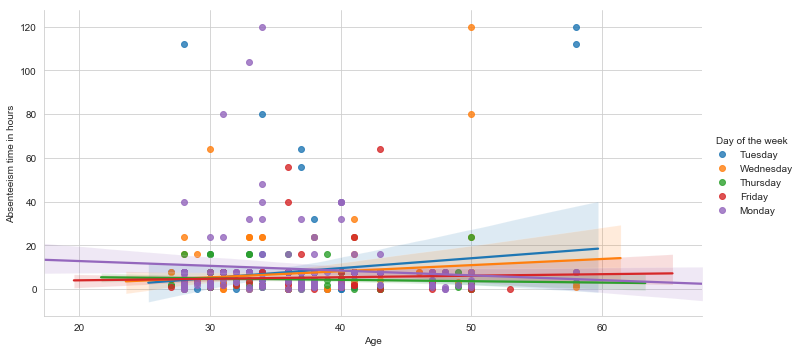

In [53]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeism time in hours',data=data,hue='Day of the week',height=5,aspect=2)

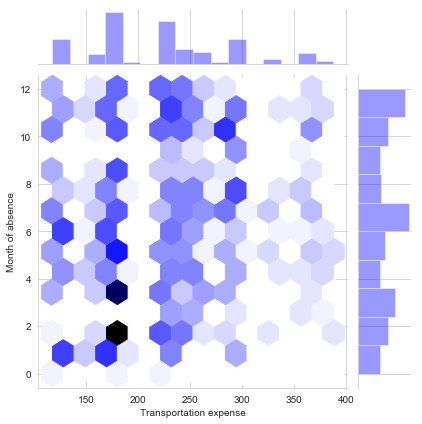

In [52]:
sns.jointplot(x='Transportation expense',y='Month of absence',data=data,kind='hex',color='blue')

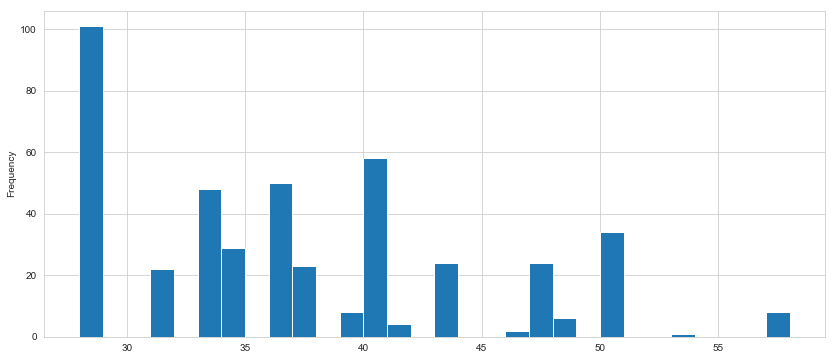

In [37]:
plt.figure(figsize=(14,6))
data[data['Son']!=0]['Age'].plot.hist(bins=30)

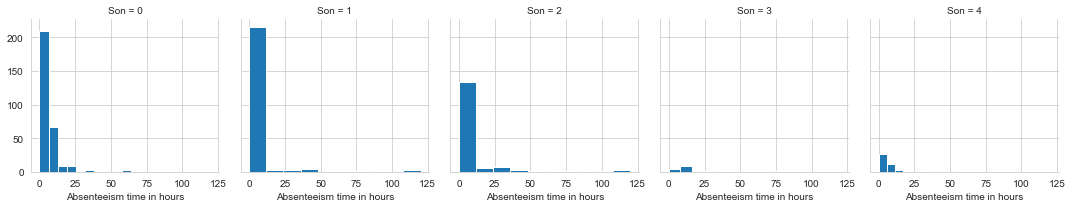

In [35]:
g = sns.FacetGrid(data=data,col='Son')
g.map(plt.hist,'Absenteeism time in hours')


In [31]:
data['Son'].value_counts()

0    298
1    229
2    156
4     42
3     15
Name: Son, dtype: int64

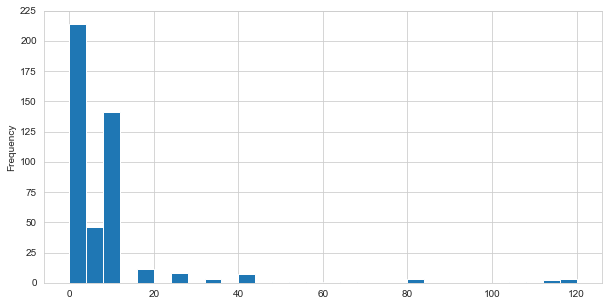

In [32]:
plt.figure(figsize=(10,5))
data[data['Son']!=0]['Absenteeism time in hours'].plot.hist(bins=30)

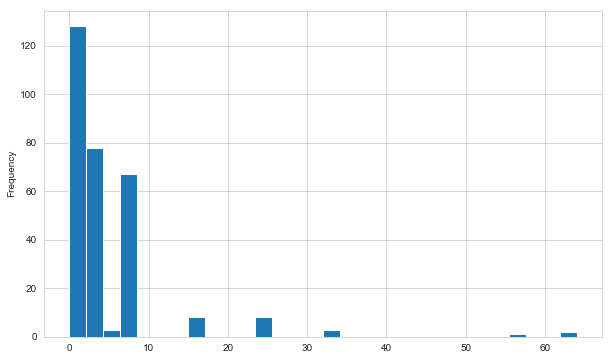

In [46]:
plt.figure(figsize=(10,6))
data[data['Son']==0]['Absenteeism time in hours'].plot.hist(bins=30)

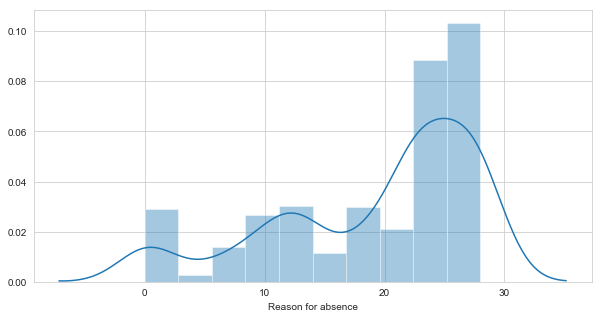

In [40]:
#Throwing focus to the highest reason for absence
reasons = data['Reason for absence']
reason_27 = data['Reason for absence']==27
plt.figure(figsize=(10,5))
sns.distplot(data['Reason for absence'])

In [44]:
roa = data.groupby('Reason for absence')
roa['Absenteeism time in hours'].max()

Reason for absence
0       0
1      64
2      24
3       8
4       8
5       8
6     120
7      40
8       8
9     112
10     48
11    120
12    112
13    120
14     40
15      8
16      3
17      8
18     80
19    104
21      8
22     16
23     16
24      8
25      8
26     16
27      3
28     24
Name: Absenteeism time in hours, dtype: int64

In [45]:
data[data['Reason for absence']==27].count()

ID                                 69
Reason for absence                 69
Month of absence                   69
Day of the week                    69
Seasons                            69
Transportation expense             69
Distance from Residence to Work    69
Service time                       69
Age                                69
Work load Average/day              69
Hit target                         69
Disciplinary failure               69
Education                          69
Son                                69
Social drinker                     69
Social smoker                      69
Pet                                69
Weight                             69
Height                             69
Body mass index                    69
Absenteeism time in hours          69
dtype: int64

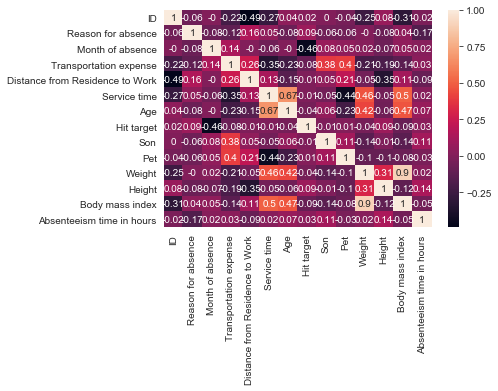

In [47]:
# checking the corellation between all the attributes
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

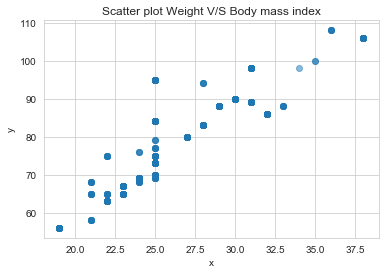

In [49]:
# corellation using scatter plots

plt.scatter(data['Body mass index'], data['Weight'], alpha=0.5)
plt.title('Scatter plot Weight V/S Body mass index')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Useful Insights

The top reasons for absence are:
(VI) Diseases of the nervous system 
(IX) Diseases of the circulatory system
(XI) Diseases of the digestive system
(XII) Diseases of the skin and subcutaneous tissue
(XIII) Diseases of the musculoskeletal system and connective tissue
(XIX) Injury, poisoning and certain other consequences of external causes

1. Physiotherapy is the major reason for absenteeism at work.(69 employees)
2. Those people with kids are mostly in the age group of 30's and tend to have a higher rate of absenteeism at work
3. People with more no. of kids are unusually with a lesser rate of absenteeism at work as it is assumed that their kids look after one another
4. The company can provide work from home option for those employees having one or two children inorder to increase productivity
5. Due to the high amount of workload, employees are opting for phisiotherapy and hence the company can provide a certain percentage of allowance for the same.
6. Transportation expence is bigger in winter months than in other seasons
7. People without children mostly around 35 and 40.

